In [1]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

In [2]:
#loading PCA dataset from saved data folder
df = pd.read_pickle('saved_data/df_PCA.pkl')

In [3]:
#getting data in better format for feature selection
x = df.drop(columns='num')
y = df['num']

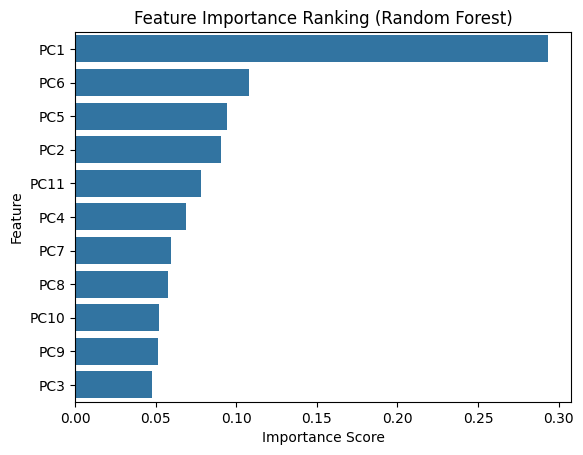

In [10]:
#Feature Importance with Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(x, y)
importances = rf.feature_importances_
feat_importance_df = pd.DataFrame({
    'feature': x.columns,
    'importance': importances
}).sort_values(by='importance', ascending=False)
sns.barplot(data=feat_importance_df,x='importance',y='feature')
plt.title('Feature Importance Ranking (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [5]:
#Recursive Feature Elimination (RFE)
rfe = RFE(estimator=rf, n_features_to_select=5)
rfe.fit(x, y)
selected_features = x.columns[rfe.support_]
print("Selected features by RFE:", list(selected_features))

Selected features by RFE: ['PC1', 'PC2', 'PC5', 'PC6', 'PC11']


In [6]:
#Chi-Square Test
chi2_selector = SelectKBest(chi2, k=5)
x_new = chi2_selector.fit_transform(x.abs(), y)
selected_chi2_features = x.columns[chi2_selector.get_support()]
print("Selected features by Chi-square:", list(selected_chi2_features))

Selected features by Chi-square: ['PC1', 'PC2', 'PC5', 'PC6', 'PC9']


In [7]:
#selecting best features
final_features = ['PC1', 'PC2', 'PC5', 'PC6']
df = pd.concat([x[final_features], y], axis=1)

In [8]:
#Saving best features and dataframe with best features
with open('saved_preprocessors/features.pkl', 'wb') as f:
    pickle.dump(final_features, f)
with open('saved_data/df_ready.pkl', 'wb') as f:
    df.to_pickle(f)